# Pokemon Statistical Analysis

The purpose of this project is to experiment with some Exploratory data analysis with some Pokèmon statistics.

## Imports

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

## Read In Data


In [15]:
poke_df = pd.read_csv('./data/pokemon.csv')
poke_df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [16]:
poke_df.describe

<bound method NDFrame.describe of        #                   Name   Type 1  Type 2  Total  HP  Attack  Defense  \
0      1              Bulbasaur    Grass  Poison    318  45      49       49   
1      2                Ivysaur    Grass  Poison    405  60      62       63   
2      3               Venusaur    Grass  Poison    525  80      82       83   
3      3  VenusaurMega Venusaur    Grass  Poison    625  80     100      123   
4      4             Charmander     Fire     NaN    309  39      52       43   
..   ...                    ...      ...     ...    ...  ..     ...      ...   
795  719                Diancie     Rock   Fairy    600  50     100      150   
796  719    DiancieMega Diancie     Rock   Fairy    700  50     160      110   
797  720    HoopaHoopa Confined  Psychic   Ghost    600  80     110       60   
798  720     HoopaHoopa Unbound  Psychic    Dark    680  80     160       60   
799  721              Volcanion     Fire   Water    600  80     110      120   

     

In [17]:
poke_df.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

## Exploratory Data Analysis

### Gen 1 Charts

In [18]:
gen_1 = poke_df.query('Generation==1')

In [19]:
gen_1.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [30]:
gen_1_means = gen_1.groupby('Type 1').mean(numeric_only=True)
gen_1_means.drop(columns=['#', 'Generation', 'Legendary'], inplace=True)
gen_1_means.head()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
Type 1,,,,,,,
Bug,366.428571,56.785714,76.428571,60.357143,46.428571,59.642857,66.785714
Dragon,440.000000,64.333333,94.000000,68.333333,73.333333,73.333333,66.666667
Electric,444.444444,54.444444,62.000000,64.666667,91.111111,73.333333,98.888889
Fairy,403.000000,82.500000,57.500000,60.500000,77.500000,77.500000,47.500000
Fighting,412.142857,63.571429,102.857143,61.000000,45.000000,73.571429,66.142857


<AxesSubplot:ylabel='Frequency'>

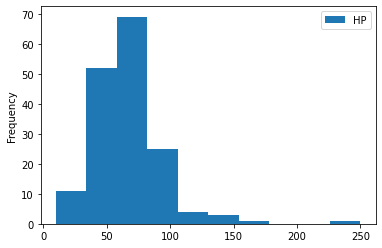

In [40]:
gen_1['HP'].plot(kind="hist", legend=True)

<AxesSubplot:ylabel='Frequency'>

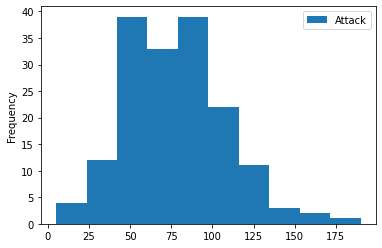

In [41]:
gen_1['Attack'].plot(kind="hist", legend=True)

<AxesSubplot:ylabel='Frequency'>

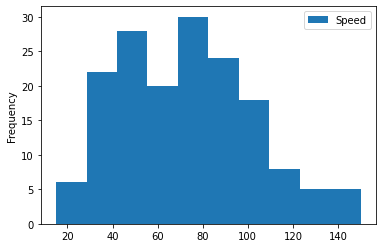

In [42]:
gen_1['Speed'].plot(kind="hist", legend=True)